### Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('laptop_price_data.csv')
print(df.shape)
print(type(df))
df.head()

(1302, 13)
<class 'pandas.core.frame.DataFrame'>


,Unnamed: 0,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
0,0,Apple,Ultrabook,8,1.37,71378.6832,0,1,Intel Core i5,0,128,Intel,Mac
1,1,Apple,Ultrabook,8,1.34,47895.5232,0,0,Intel Core i5,0,0,Intel,Mac
2,2,HP,Notebook,8,1.86,30636.0000,0,0,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,3,Apple,Ultrabook,16,1.83,135195.3360,0,1,Intel Core i7,0,512,AMD,Mac
4,4,Apple,Ultrabook,8,1.37,96095.8080,0,1,Intel Core i5,0,256,Intel,Mac


In [3]:
# Dropping Unnamed Column as it is just showing the Serial Number
df.drop('Unnamed: 0', axis = 1, inplace =True)
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')

In [4]:
df1 = df.copy()

## Data Preprocessing

### 1) Handling Null Values

In [5]:
df.isna().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
Touchscreen    0
Ips            0
Cpu brand      0
HDD            0
SSD            0
Gpu brand      0
os             0
dtype: int64

### 2) Handling the Duplicate rows

In [6]:
df.duplicated().sum()

30

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.duplicated().sum()

0

### 3) Checking Data Types

In [9]:
df.dtypes

Company         object
TypeName        object
Ram              int64
Weight         float64
Price          float64
Touchscreen      int64
Ips              int64
Cpu brand       object
HDD              int64
SSD              int64
Gpu brand       object
os              object
dtype: object

### 4) Handling Outliers

In [10]:
df.describe(percentiles = [0.01, 0.02, 0.03, 0.05, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99]).T

,count,mean,std,min,1%,2%,3%,5%,50%,90%,95%,96%,97%,98%,99%,max
Ram,1272.0,8.451258,5.099249,2.00,2.000000,4.00,4.00000,4.00000,8.00,16.0000,16.00,16.000,16.0000,16.000000,32.000,64.00
Weight,1272.0,2.041761,0.669088,0.69,0.955500,1.08,1.10000,1.17000,2.04,2.8000,3.20,3.358,3.7800,4.300000,4.420,4.70
Price,1272.0,60520.657755,37355.685811,9270.72,12960.514512,14119.20,15251.24016,17214.52824,52693.92,109170.1872,130482.72,136599.264,145283.3712,153350.208288,167855.976,324954.72
Touchscreen,1272.0,0.147013,0.354258,0.00,0.000000,0.00,0.00000,0.00000,0.00,1.0000,1.00,1.000,1.0000,1.000000,1.000,1.00
Ips,1272.0,0.279874,0.449114,0.00,0.000000,0.00,0.00000,0.00000,0.00,1.0000,1.00,1.000,1.0000,1.000000,1.000,1.00
HDD,1272.0,414.040881,518.128204,0.00,0.000000,0.00,0.00000,0.00000,0.00,1000.0000,1000.00,1000.000,1000.0000,2000.000000,2000.000,2000.00
SSD,1272.0,186.298742,186.597777,0.00,0.000000,0.00,0.00000,0.00000,256.00,512.0000,512.00,512.000,512.0000,512.000000,1000.000,1024.00


### Boxplot for Outliers

In [11]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


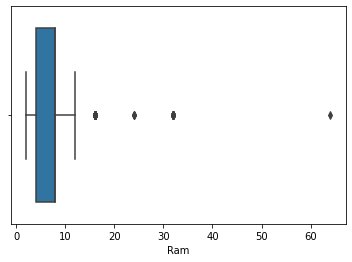

In [12]:
sns.boxplot(df['Ram'])
plt.show()

In [13]:
print(df[df['Ram']>20].shape)

(21, 12)


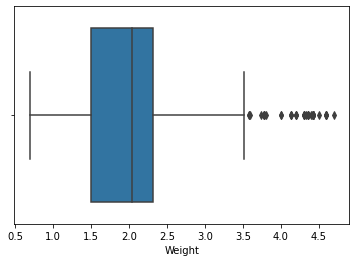

In [14]:
sns.boxplot(x = df['Weight'])
plt.show()

In [15]:
df[df['Weight']>3.5].shape

(46, 12)

#### Outlier Clipping

In [16]:
# Replacing outliers where the Weight is greater than 3.5
df['Weight'] = np.where(df['Weight']>3.5, 3.5, df['Weight'])

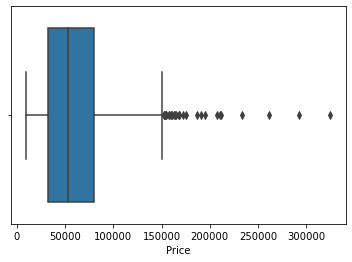

In [17]:
sns.boxplot(x=df['Price'])
plt.show()

In [18]:
df[df['Price']>200000].shape

(7, 12)

In [19]:
df[df['Price']>200000].head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
196,Razer,Gaming,32,3.49,324954.72,1,0,Intel Core i7,0,1000,Nvidia,Windows
238,Asus,Gaming,32,3.50,207259.20,0,0,Intel Core i7,1000,512,Nvidia,Windows
610,Lenovo,Notebook,32,2.50,261018.72,0,1,Other Intel Processor,0,1000,Nvidia,Windows
749,HP,Workstation,16,3.00,233845.92,0,1,Other Intel Processor,0,256,Nvidia,Windows
830,Razer,Gaming,32,3.49,292986.72,1,0,Intel Core i7,0,512,Nvidia,Windows


#### Outlier Clipping

In [20]:
# df['Price'] = np.where(df['Price']>167855.976, 167855.976, df['Price'])

## EDA

### Top 10 Different Laptop Companies with highest count

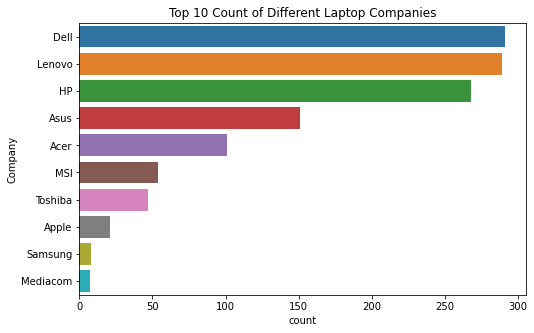

In [21]:
plt.figure(figsize=(8,5))
ax = sns.countplot(y = df['Company'],
             order = df['Company'].value_counts().sort_values(ascending=False)[:10].index)
plt.title('Top 10 Count of Different Laptop Companies')
plt.show()

In [22]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')

### Count of TypeName

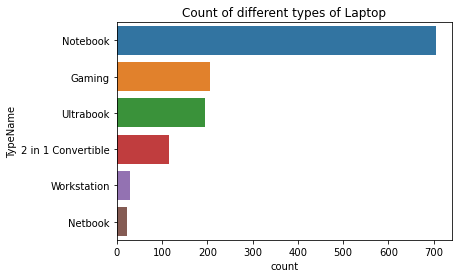

In [23]:
ax = sns.countplot(y = df['TypeName'],
             order = df['TypeName'].value_counts().sort_values(ascending=False).index)
plt.title('Count of different types of Laptop')
plt.show()

### Count of CPU Brand

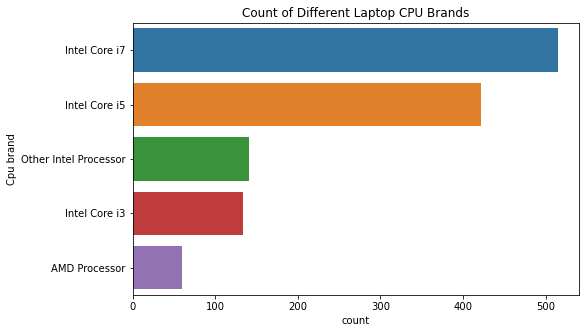

In [24]:
plt.figure(figsize=(8,5))
ax = sns.countplot(y = df['Cpu brand'],
             order = df['Cpu brand'].value_counts().sort_values(ascending=False).index)
plt.title('Count of Different Laptop CPU Brands')
plt.show()

### Count of GPU Brand

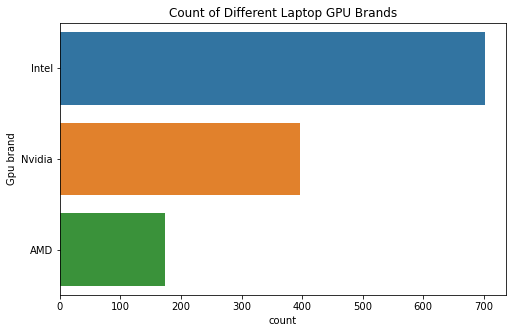

In [25]:
plt.figure(figsize=(8,5))
ax = sns.countplot(y = df['Gpu brand'],
             order = df['Gpu brand'].value_counts().sort_values(ascending=False).index)
plt.title('Count of Different Laptop GPU Brands')
plt.show()

### Boxplot for Price for different CPU Brands

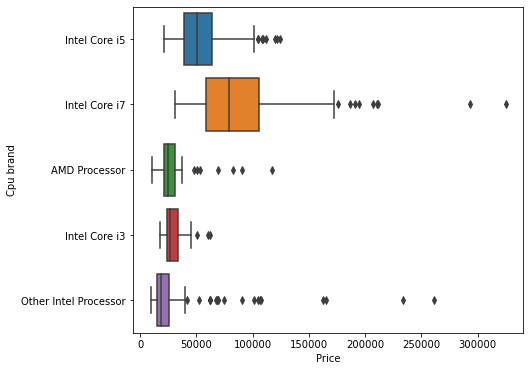

In [26]:
plt.figure(figsize=(7,6))
sns.boxplot(y=df['Cpu brand'], x=df['Price'])
plt.show()

### Boxplot for GPU Brand vs Price

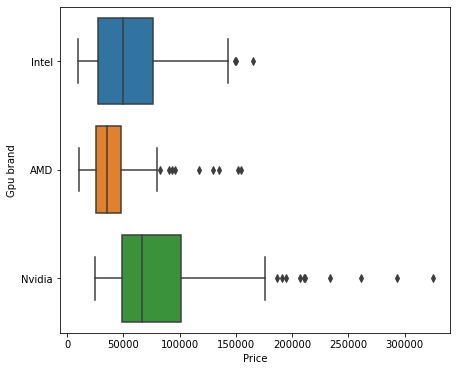

In [27]:
plt.figure(figsize=(7,6))
sns.boxplot(y=df['Gpu brand'], x=df['Price'])
plt.show()

### Distplot for Price

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


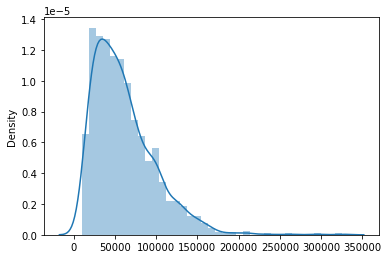

In [28]:
sns.distplot(x=df['Price'])
plt.show()

### Checking Correlation among the Columns

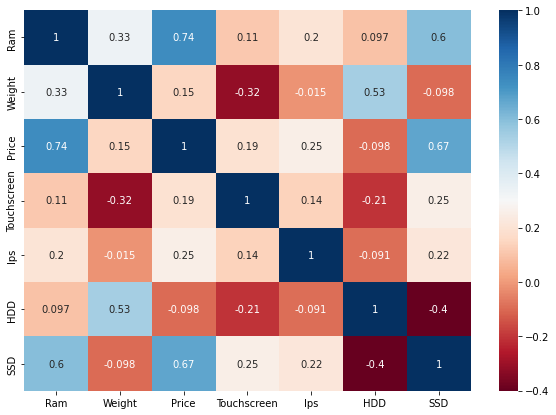

In [29]:
corr = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap='RdBu')
plt.show()

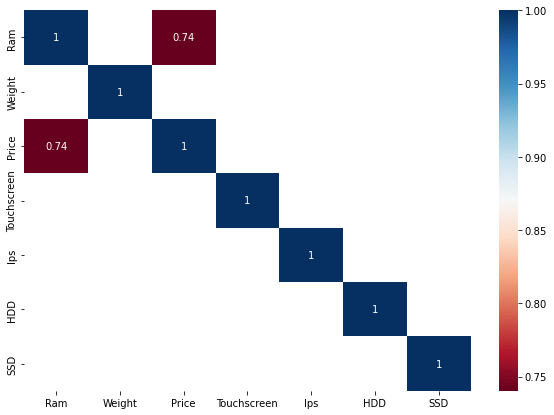

In [30]:
# To filter the higher values
corr = df.corr()
corr = corr[corr>0.7]
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap='RdBu')
plt.show()

#### Inference :
High Correlation does not exist amongst the Independent Features.

In [31]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,Intel Core i5,0,256,Intel,Mac


### Select the Dependent and Independent Features

In [32]:
x = df.drop('Price', axis=1)
y = df['Price']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(1272, 11)
(1272,)


## Splitting the Data into Train and Test Data

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(954, 11)
(318, 11)
(954,)
(318,)


### Creating Functions to Evaluate the Model in terms of R2Score, MSE, RMSE, MAE

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [42]:
def eval_model(ytest, ypred) :
    mse = mean_squared_error(ytest, ypred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(ytest, ypred)
    r2 = r2_score(ytest, ypred)
    print('MAE', mae)
    print('MSE', mse)
    print('RMSE', rmse)
    print('R2 Score', r2)

### Import ML Regression Libraries

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

### Import the neccessary sklearn transformational Libraries

In [38]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [39]:
print(x.columns)
x.head(2)

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Touchscreen', 'Ips',
       'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')


,Company,TypeName,Ram,Weight,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,Intel Core i5,0,0,Intel,Mac


## 1) Linear Regression

In [43]:
step1 = ColumnTransformer(transformers=
                         [('col_transf', OneHotEncoder(drop = 'first', sparse=False), [0,1,6,9,10])],
                         remainder='passthrough')
step2 = LinearRegression()

pipe_lr = Pipeline([('step1', step1), ('step2', step2)])

pipe_lr.fit(x_train, y_train)

ypred_lr = pipe_lr.predict(x_test)

eval_model(y_test, ypred_lr)

MAE 13940.9013091491
MSE 409547387.3004308
RMSE 20237.27717111249
R2 Score 0.7020504611099125


## 2) Ridge Regression

In [49]:
step1 = ColumnTransformer(transformers=
                         [('col_transf', OneHotEncoder(drop = 'first', sparse=False), [0,1,6,9,10])],
                         remainder='passthrough')
step2 = Ridge(alpha=10)

pipe_ridge = Pipeline([('step1', step1), ('step2', step2)])

pipe_ridge.fit(x_train, y_train)

ypred_ridge = pipe_ridge.predict(x_test)

eval_model(y_test, ypred_ridge)

MAE 13661.7943201756
MSE 393320839.5639608
RMSE 19832.31805825937
R2 Score 0.7138554257264067


## 3) Lasso Regression

In [51]:
step1 = ColumnTransformer(transformers=
                         [('col_transf', OneHotEncoder(drop = 'first', sparse=False), [0,1,6,9,10])],
                         remainder='passthrough')
step2 = Lasso(alpha=0.1)

pipe_lasso = Pipeline([('step1', step1), ('step2', step2)])

pipe_lasso.fit(x_train, y_train)

ypred_lasso = pipe_lasso.predict(x_test)

eval_model(y_test, ypred_lasso)

MAE 13938.920406094998
MSE 409444854.3501269
RMSE 20234.743743129708
R2 Score 0.7021250547862766


## 4) KNeighbors Regressor

In [53]:
step1 = ColumnTransformer(transformers=
                         [('col_transf', OneHotEncoder(drop = 'first', sparse=False), [0,1,6,9,10])],
                         remainder='passthrough')
step2 = KNeighborsRegressor(n_neighbors=3)

pipe_knn = Pipeline([('step1', step1), ('step2', step2)])

pipe_knn.fit(x_train, y_train)

ypred_knn = pipe_knn.predict(x_test)

eval_model(y_test, ypred_knn)

MAE 13343.511894339623
MSE 424375257.72532666
RMSE 20600.370329810255
R2 Score 0.6912630472652264


## 5) DecisionTree Regressor

In [59]:
step1 = ColumnTransformer(transformers=
                         [('col_transf', OneHotEncoder(drop = 'first', sparse=False), [0,1,6,9,10])],
                         remainder='passthrough')
step2 = DecisionTreeRegressor(max_depth=8, min_samples_split=15)

pipe_dt = Pipeline([('step1', step1), ('step2', step2)])

pipe_dt.fit(x_train, y_train)

ypred_dt = pipe_dt.predict(x_test)

eval_model(y_test, ypred_dt)

MAE 12494.040137810436
MSE 337765355.9831738
RMSE 18378.3937269603
R2 Score 0.7542725574894004


## 6) RandomForest Regressor

In [61]:
step1 = ColumnTransformer(transformers=
                         [('col_transf', OneHotEncoder(drop = 'first', sparse=False), [0,1,6,9,10])],
                         remainder='passthrough')
step2 = RandomForestRegressor(n_estimators=100,max_depth=8, min_samples_split=11, random_state=5)

pipe_rf = Pipeline([('step1', step1), ('step2', step2)])

pipe_rf.fit(x_train, y_train)

ypred_rf = pipe_rf.predict(x_test)

eval_model(y_test, ypred_rf)

MAE 11387.353450533621
MSE 284154451.6936889
RMSE 16856.881434407995
R2 Score 0.7932749897056632


### Inference :-
Random Forest is the best performing model in terms of R2 Score and RMSE

## Saving the Model and the DataFrame

In [62]:
import pickle

In [63]:
pickle.dump(pipe_rf, open('rf1.pkl', 'wb'))     # Saving the best performing ML model
pickle.dump(df, open('data1.pkl', 'wb'))        # Saving the DataFrame

In [73]:
df['Ram'].unique()

array([ 8, 16,  4,  2, 12,  6, 32, 24, 64], dtype=int64)